In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# load in output file from GuideScan
guidescan_output = pd.read_csv('/iblm/netapp/home/karthik/GuideScan/Gasperini2019/guidescan_output.csv')
guidescan_output['guide_spacer'] = guidescan_output['gRNA'].apply(lambda x: x[:-3])
guidescan_output.head()

,Index,gRNA,Chromosome,Start,End,Strand,Num Off-Targets,Off-Target Summary,Specificity,Cutting-Efficiency,guide_spacer
0,0,CTAAAGCATTGGCTGAGAAGNGG,chr8,23911081.0,23911103.0,-,41.0,2:2 | 3:39,0.136228,0.565010,CTAAAGCATTGGCTGAGAAG
1,1,GTAGTTCACATAATCCCTGTNGG,chr4,25698193.0,25698215.0,-,55.0,2:0 | 3:55,0.165929,0.572492,GTAGTTCACATAATCCCTGT
2,2,AAGTTGACTCTACATAGCAGNGG,chr8,23912565.0,23912587.0,+,22.0,2:1 | 3:21,0.341067,0.636691,AAGTTGACTCTACATAGCAG
3,3,AATATTCTCCCTCATTCTGGNGG,chr5,12539360.0,12539382.0,-,803.0,2:26 | 3:777,0.002744,0.619800,AATATTCTCCCTCATTCTGG
4,4,AATCCTCTAATGGACGAAGANGG,chr8,23913057.0,23913079.0,-,24.0,2:0 | 3:24,0.334415,0.602272,AATCCTCTAATGGACGAAGA


In [3]:
# load in gRNA groups with spacer sequences
guide_sequences = pd.read_csv('/iblm/netapp/data1/external/Gasperini2019/gasperini_2019_suppl_table_2.at_scale.csv')
guide_sequences.head()

,guide_group,guide_spacer
0,SH3BGRL3_TSS,AAACCGCTCCCGAGCACGGG
1,MTRNR2L8_TSS,AAATAGTGGGAAGATTCGTG
2,FAM83A_TSS,AACACACCACGGAGGAGTGG
3,ZNF593_TSS,AACAGCCCGGCCGGCCAAGG
4,ATPIF1_TSS,AACGAGAGACTGCTTGCTGG


In [4]:
# merge data frames together on spacer sequence
guide_sequences = guide_sequences.merge(guidescan_output, on = 'guide_spacer')
guide_sequences.tail(20)

,guide_group,guide_spacer,Index,gRNA,Chromosome,Start,End,Strand,Num Off-Targets,Off-Target Summary,Specificity,Cutting-Efficiency
12407,random_12,TACAACTGCATTACATGCCA,17,TACAACTGCATTACATGCCANGG,chr5,12540459.0,12540481.0,-,28.0,2:0 | 3:28,0.211998,0.576426
12408,scrambled_18,TAGCTTGCACTCCCCTTGTG,46,TAGCTTGCACTCCCCTTGTGNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12409,random_8,TATCTCAGAGTACTATTCCA,655,TATCTCAGAGTACTATTCCANGG,Guide not found in Guidescan2 database. This i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12410,scrambled_3,TATTCGTACCGGGCAGCAGG,47,TATTCGTACCGGGCAGCAGGNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12411,random_21,TCAGGGGTCGATCTTTAACC,65,TCAGGGGTCGATCTTTAACCNGG,Multiple perfect matches found. Cannot resolve...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12412,random_12,TCCGCAGTCAAAAGACCGAG,66,TCCGCAGTCAAAAGACCGAGNGG,Multiple perfect matches found. Cannot resolve...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12413,random_21,TCTAATCTCAGCTACTTGGG,52,TCTAATCTCAGCTACTTGGGNGG,Multiple perfect matches found. Cannot resolve...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12414,random_18,TCTGCTAAACTGCCTACACA,18,TCTGCTAAACTGCCTACACANGG,chr6,23838576.0,23838598.0,+,24.0,2:2 | 3:22,0.277867,0.642218
12415,scrambled_21,TCTTGGCCTGCTTGGTGTCT,10,TCTTGGCCTGCTTGGTGTCTNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12416,random_15,TGAACAATACTCCAGTACAT,67,TGAACAATACTCCAGTACATNGG,Multiple perfect matches found. Cannot resolve...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# count the number of guides that do not have an efficiency
unmatched_guides = guide_sequences[guide_sequences['Start'].isna()]
unmatched_guides.shape

(2253, 12)

In [7]:
unmatched_guides.head(20)

,guide_group,guide_spacer,Index,gRNA,Chromosome,Start,End,Strand,Num Off-Targets,Off-Target Summary,Specificity,Cutting-Efficiency
0,SH3BGRL3_TSS,AAACCGCTCCCGAGCACGGG,0,AAACCGCTCCCGAGCACGGGNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MTRNR2L8_TSS,AAATAGTGGGAAGATTCGTG,1,AAATAGTGGGAAGATTCGTGNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FAM83A_TSS,AACACACCACGGAGGAGTGG,2,AACACACCACGGAGGAGTGGNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ZNF593_TSS,AACAGCCCGGCCGGCCAAGG,3,AACAGCCCGGCCGGCCAAGGNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ATPIF1_TSS,AACGAGAGACTGCTTGCTGG,4,AACGAGAGACTGCTTGCTGGNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,TIPRL_TSS,AACGGCTCGGAAGCCTAGGG,5,AACGGCTCGGAAGCCTAGGGNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MYL4_TSS,AAGAAGAAACCGAGAGACGG,6,AAGAAGAAACCGAGAGACGGNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CNBP_TSS,AAGACGGCTCGCAAGGTAGG,7,AAGACGGCTCGCAAGGTAGGNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,RPS3_TSS,AAGAGGAAGGTGAGCCTCTG,1366,AAGAGGAAGGTGAGCCTCTGNGG,Guide not found in Guidescan2 database. This i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,RPL23_TSS,AAGATGTCGAAGCGAGGTGG,8,AAGATGTCGAAGCGAGGTGGNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_24018/558920184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unmatched_guides['Chromosome'] = unmatched_guides['Chromosome'].replace({'No match found for input sequence.': 'No match', 'Guide not found in Guidescan2 database. This is because it has multiple off-targets at distance 1.': 'Multiple off-targets', 'Multiple perfect matches found. Cannot resolve sequence to unique coordinates.': 'Multiple matches'})


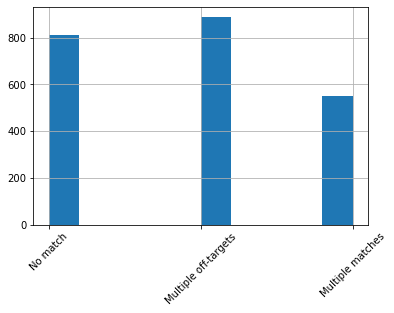

In [7]:
# plot the distribution of GuideScan failure reasons
unmatched_guides['Chromosome'] = unmatched_guides['Chromosome'].replace({'No match found for input sequence.': 'No match', 'Guide not found in Guidescan2 database. This is because it has multiple off-targets at distance 1.': 'Multiple off-targets', 'Multiple perfect matches found. Cannot resolve sequence to unique coordinates.': 'Multiple matches'})
ax = plt.gca()
plt.xticks(rotation=45)
unmatched_guides['Chromosome'].hist();

In [14]:
# merge guide sequences with BLAST coordinates
def get_genomic_coordinates(seq):
    '''helper function to get genomic coordinates from BLAST output'''
    
    # load in BLAST hits and sort by evalue
    blast_path = '/iblm/netapp/home/karthik/gasperini_project/blast/'
    colnames = ['chrom' ,'evalue', 'start', 'end', '1', '2', '3', '4', '5', '6', '7']
    if os.path.exists(blast_path + 'output/' + seq + '.tsv'):
        hits_df = pd.read_csv(blast_path + 'output/' + seq + '.tsv', sep='\t', names=colnames)
        sorted_hits_df = hits_df.sort_values(by='evalue', ascending=True)
        
        # return start and end coordinates from BLAST
        if sorted_hits_df.shape[0] == 0:
            return [np.nan, np.nan, np.nan, np.nan]
        else:    
            start_coord = sorted_hits_df.iloc[0]['start']
            end_coord = sorted_hits_df.iloc[0]['end']
            chrom = sorted_hits_df.iloc[0]['chrom']
            evalue = sorted_hits_df.iloc[0]['evalue']
            return [start_coord, end_coord, chrom, evalue]
    else:
        return [np.nan, np.nan, np.nan, np.nan]
    
    
# get genomic coordinates for each spacer sequence
unmatched_guides['blast_genomic_coords'] = unmatched_guides['guide_spacer'].apply(get_genomic_coordinates)

# divide BLAST output into separate columns
unmatched_guides['blast_start'] = unmatched_guides['blast_genomic_coords'].apply(lambda x: x[0])
unmatched_guides['blast_end'] = unmatched_guides['blast_genomic_coords'].apply(lambda x: x[1])
unmatched_guides['blast_chrom'] = unmatched_guides['blast_genomic_coords'].apply(lambda x: x[2])
unmatched_guides['blast_evalue'] = unmatched_guides['blast_genomic_coords'].apply(lambda x: x[3])

unmatched_guides.head()

/tmp/ipykernel_24018/2207928684.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unmatched_guides['blast_genomic_coords'] = unmatched_guides['guide_spacer'].apply(get_genomic_coordinates)
/tmp/ipykernel_24018/2207928684.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unmatched_guides['blast_start'] = unmatched_guides['blast_genomic_coords'].apply(lambda x: x[0])
/tmp/ipykernel_24018/2207928684.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,guide_group,guide_spacer,Index,gRNA,Chromosome,Start,End,Strand,Num Off-Targets,Off-Target Summary,Specificity,Cutting-Efficiency,blast_genomic_coords,blast_start,blast_end,blast_chrom,blast_evalue
0,SH3BGRL3_TSS,AAACCGCTCCCGAGCACGGG,0,AAACCGCTCCCGAGCACGGGNGG,No match,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[26606569.0, 19.0, 0.032, 26606551.0]",26606569.0,19.0,0.032,26606551.0
1,MTRNR2L8_TSS,AAATAGTGGGAAGATTCGTG,1,AAATAGTGGGAAGATTCGTGNGG,No match,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[1976.0, 16.0, 2.0, 1961.0]",1976.0,16.0,2.000,1961.0
2,FAM83A_TSS,AACACACCACGGAGGAGTGG,2,AACACACCACGGAGGAGTGGNGG,No match,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[17300.0, 15.0, 7.7, 17314.0]",17300.0,15.0,7.700,17314.0
3,ZNF593_TSS,AACAGCCCGGCCGGCCAAGG,3,AACAGCCCGGCCGGCCAAGGNGG,No match,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[13909.0, 15.0, 7.7, 13895.0]",13909.0,15.0,7.700,13895.0
4,ATPIF1_TSS,AACGAGAGACTGCTTGCTGG,4,AACGAGAGACTGCTTGCTGGNGG,No match,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[1253798.0, 16.0, 2.0, 1253813.0]",1253798.0,16.0,2.000,1253813.0


In [25]:
guide_sequences['guide_spacer'].str.endswith('T').sum()

1190